In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

housing = load_boston()

/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [2]:
feature = pd.DataFrame(housing.data, columns=housing.feature_names)
target = pd.DataFrame(housing.target, columns=['MEDV'])

In [3]:
total = pd.concat([feature,target], axis=1)
print(total.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

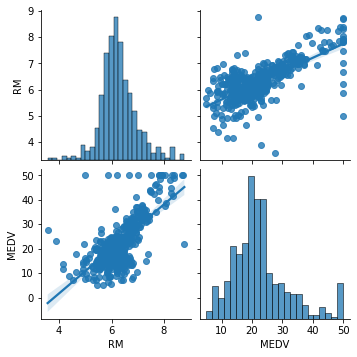

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(pd.concat([feature['RM'], target], axis= 1), kind='reg')

In [5]:
import statsmodels.api as sm

model = sm.OLS(target, sm.add_constant(feature['RM'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.49e-74
Time:                        15:28:57   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

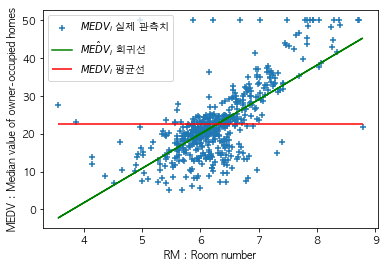

In [6]:
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 회귀선 도출
target_pred = model.predict()

plt.scatter(feature['RM'], target, marker='+', label='$MEDV_i$ 실제 관측치')
plt.plot(feature['RM'], target_pred, color = 'g', label='$\hat{MEDV}_i$ 회귀선')
plt.hlines(target.mean(), feature['RM'].min(), feature['RM'].max(), color = 'r', label='$MEDV_i$ 평균선')
plt.legend()
plt.xlabel('RM : Room number')
plt.ylabel('MEDV : Median value of owner-occupied homes')
plt.show()

In [7]:
target_array = housing.target

In [14]:
# y_hat 도출
target_pred1 = model.predict()

# SST(편차의 제곱, 총변동), SSR(편차와 잔차의 차이 제곱 : 회귀식으로 설명가능한 변동), SSE(잔차의 제곱 : 회귀식으로 설명하지 못하는 변동)
SST = sum((target_array - target_array.mean()) ** 2)
SSR = sum((target_pred1 - target_array.mean()) ** 2)
SSE = sum((model.resid) ** 2)

r_squared = (1 - (SSE/SST))

print(f'매서드로 구한 결정계수 R-squared : {model.rsquared : .5f}')
print(f'직접 구한 결정계수 R-squared : {r_squared : .5f}')

매서드로 구한 결정계수 R-squared :  0.48353
직접 구한 결정계수 R-squared :  0.48353


In [15]:
n = model.nobs
k = 1

adj_r_squared = 1 - (SSE / (n - k - 1)) / (SST / (n - 1)) 

print(f'매서드로 구한 조정된 결정계수 Adj R-squared : {model.rsquared_adj : .5f}')
print(f'직접 구한 조정된 결정계수 Adj R-squared : {adj_r_squared : .5f}')

매서드로 구한 조정된 결정계수 Adj R-squared :  0.48250
직접 구한 조정된 결정계수 Adj R-squared :  0.48250


In [16]:
# MSE, MSR로 F 값 구하는 법
# SSR, SSE는 분산으로서 카이제곱 분포를 따르고 카이제곱 분포를 따르는 두 변수의 비율은 F분포를 따른다.
MSR = SSR/(2-1)
MSE = SSE/(n - k - 1)

# F 값은 회귀식으로 설명 가능한 변동이 설명하지 못하는 변동에 대해 어느정도의 비율을 가지고 있는지 알 수 있음.
F1 = MSR/MSE

# 결정계수로 F 값 구하는 법
F2 = r_squared/( (1-r_squared) / (n-k-1) )

print(f'매서드로 구한 F 값 : {model.fvalue : .5f}')
print(f'MSE, MSR로 구한 F 값 : {F1 : .5f}')
print(f'결정계수로 구한 F 값 : {F2 : .5f}')

매서드로 구한 F 값 :  471.84674
MSE, MSR로 구한 F 값 :  471.84674
결정계수로 구한 F 값 :  471.84674


In [10]:
# 회귀계수
y = np.array(target_array - target_array.mean())
x = np.array(feature['RM'] - feature['RM'].mean())

beta = np.sum(x * y) / np.sum(x **2)

print(f'매서드로 구한 회귀계수 coef \u03B2 : {model.params[1] : .5f}')
print(f'직접 구한 회귀계수 coef \u03B2 : { beta : .5f}')

매서드로 구한 회귀계수 coef β :  9.10211
직접 구한 회귀계수 coef β :  9.10211


In [11]:
# 참고 (회귀계수와 상관계수의 관계)
from scipy import stats

print(f'feature, target의 상관계수 : {stats.pearsonr(feature.RM, target_array)[0] : .5f}')
print(f'상관계수 = 회귀계수 * (x^2/y^2)^0.5 : {beta * ((sum(x ** 2) / sum(y ** 2)) ** 0.5) : .5f}')

feature, target의 상관계수 :  0.69536
상관계수 = 회귀계수 * (x^2/y^2)^0.5 :  0.69536


In [12]:
# 회귀계수의 표준편차
var_error = np.sum((model.resid) ** 2) / model.df_resid
deviation_x = np.sum((feature['RM'] - feature['RM'].mean()) ** 2)   

std_beta = (var_error/deviation_x) ** 0.5

print(f'매서드로 구한 회귀계수의 표준편차 se(\u03B2) : {model.cov_params()["RM"][1] ** 0.5 : .5f}')
print(f'직접 구한 회귀계수의 표준편차 se(\u03B2) : { std_beta : .5f}')

매서드로 구한 회귀계수의 표준편차 se(β) :  0.41903
직접 구한 회귀계수의 표준편차 se(β) :  0.41903


In [13]:
# 회귀계수의 t값
t_beta = beta/std_beta

print(f'매서드로 구한 회귀계수(\u03B2)의 t값 : {model.tvalues[1] : .5f}')
print(f'직접 구한 회귀계수(\u03B2)의 t값 : { t_beta : .5f}')

매서드로 구한 회귀계수(β)의 t값 :  21.72203
직접 구한 회귀계수(β)의 t값 :  21.72203
